In [21]:
import numpy as np 
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
df="/kaggle/input/lego-minifigures-classification"

In [6]:
datagen=ImageDataGenerator(
rescale=1.0/255,
rotation_range=40,
width_shift_range=0.2, 
height_shift_range=0.2,
horizontal_flip=True,
fill_mode="nearest",
zoom_range=0.2,
shear_range=0.2
)

In [8]:
train_data=datagen.flow_from_directory(
df,
target_size=(256,256),
batch_size=32,
class_mode=None,
)

Found 494 images belonging to 5 classes.


# # Deep learning

In [33]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,TimeDistributed,BatchNormalization,Dropout,Input,ReLU,Conv2DTranspose,Reshape,MultiHeadAttention
from keras.models import Model
from keras.initializers import HeNormal
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [40]:
inputs=Input(shape=(256,256,3))
E=Conv2D(32,(3,3),padding="same",activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(inputs)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Conv2D(64,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Conv2D(128,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)
E=Conv2D(256,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=MaxPooling2D(pool_size=(2,2),strides=(2,2))(E)

E=Conv2D(556,(3,3),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)

flatten=E.shape[1]*E.shape[2]
R=Reshape((flatten,556))(E)
M=MultiHeadAttention(num_heads=5,key_dim=556)(R,R)
R=Reshape((E.shape[1],E.shape[2],556))(M)


E=Conv2DTranspose(256,(3,3),strides=(2,2),padding="same",activation="relu",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(R)
E=ReLU()(E)

E=BatchNormalization()(E)
E=Conv2DTranspose(128,(3,3),strides=(2,2),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=Conv2DTranspose(64,(3,3),strides=(2,2),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
E=Conv2DTranspose(32,(3,3),strides=(2,2),padding="same",kernel_initializer=HeNormal(),kernel_regularizer=l2(0.01))(E)
E=ReLU()(E)
E=BatchNormalization()(E)
outputs=Conv2D(3,(3,3),activation="sigmoid",padding="same")(E)
model=Model(inputs,outputs)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 256, 256,  │        896 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_61[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_45    │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_45… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_60 (ReLU)     │ (None, 128, 128,  │          0 │ conv2d_62[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ re_lu_60[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_46    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_46… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_61 (ReLU)     │ (None, 64, 64,    │          0 │ conv2d_63[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ re_lu_61[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_47    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_47… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_62 (ReLU)     │ (None, 32, 32,    │          0 │ conv2d_64[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ re_lu_62[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_48    │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 16, 16,    │  1,281,580 │ max_pooling2d_48

 Total params: 9,537,119 (36.38 MB)

 Trainable params: 9,534,087 (36.37 MB)

 Non-trainable params: 3,032 (11.84 KB)

In [43]:
for i in train_data:
    model.fit(i,i,epochs=10)
    break

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3414 - loss: 33.3696
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3424 - loss: 31.8801
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.3439 - loss: 30.4493
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.3456 - loss: 29.0769
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.3477 - loss: 27.7619
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3494 - loss: 26.5032
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3482 - loss: 25.3003
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3506 - loss: 24.1506
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.3533 - loss: 23.0511
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3575 - loss: 22.0012


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


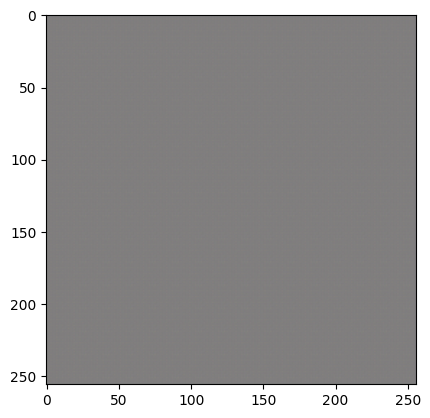

In [46]:
# for i in train_data[0]:
prediction=model.predict(train_data[0])
plt.imshow(prediction[10])
plt.show()
#     break
    